In [76]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.(Show the shape and column names as well.) (Include your Python code and output in the code box below.
import pandas as pd
df=pd.read_csv(r"/BIKE DETAILS.csv")
print(df.shape)
print(df.columns)
df.head(10)

(1061, 7)
Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [77]:
#Question 2: Check for missing values in all columns and describe your approach for handling them
df.isnull().sum()
df.info()
import seaborn as sns
import matplotlib.pyplot as plt
print((df.isnull().sum() / len(df.isnull())) * 100)
#sns.pairplot(df)
# it has low null value but it has high correlation  with selling priceso we can't drop the null values so i will handle this using replace with mean
#df.fillna(df['ex_showroom_price'].mean(),inplace=True)
#df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


<Axes: xlabel='selling_price', ylabel='Count'>

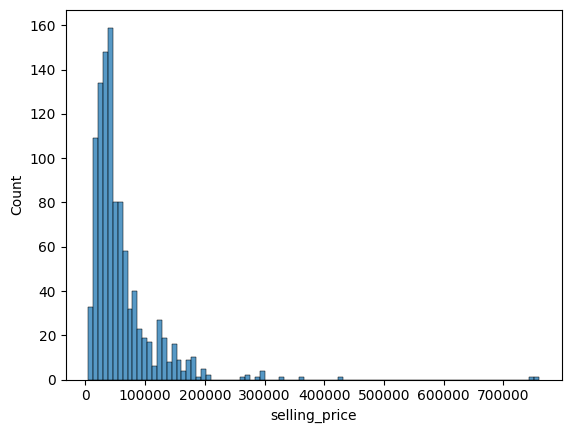

In [78]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.
sns.histplot(df['selling_price'])
#It is right skewed and most of the selling price concentrated in between 0 to 100000 and also some outlier present

<Axes: xlabel='seller_type', ylabel='selling_price'>

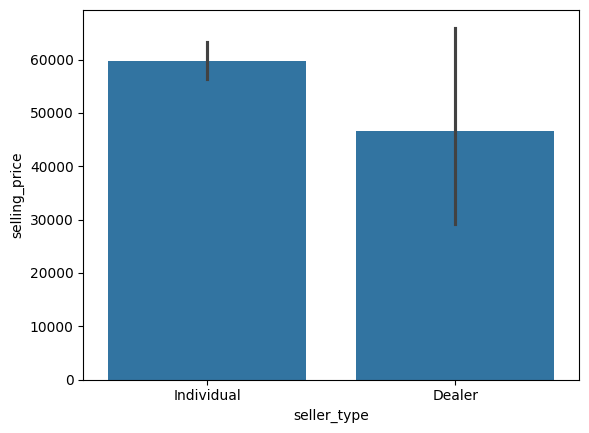

In [79]:
'''Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation .'''

sns.barplot(x='seller_type',y='selling_price',data=df)
#individual average selling price is higher than dealer

<Axes: xlabel='owner', ylabel='km_driven'>

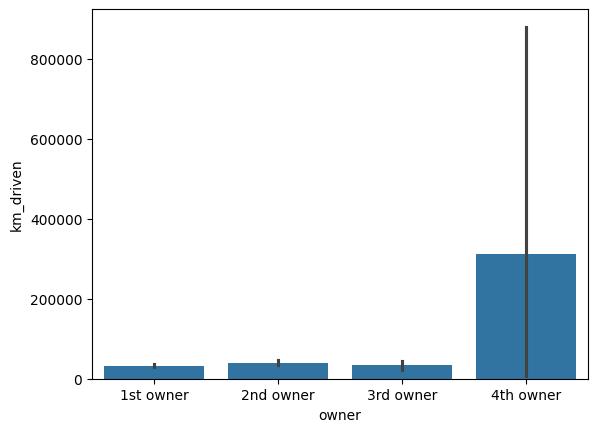

In [80]:
#Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
sns.barplot(x='owner',y='km_driven',data=df)

In [81]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
df.describe()
Q1=df['km_driven'].quantile(0.25)
Q3=df['km_driven'].quantile(0.75)
IQR=Q3-Q1
min_range=Q1-1.5*IQR
max_range=Q3+1.5*IQR
df_new=df[(df['km_driven']>min_range) & (df['km_driven']<max_range)] #removed outliers
df_new.describe()


,selling_price,year,km_driven,ex_showroom_price
count,1022.000000,1022.000000,1022.000000,6.070000e+02
mean,60810.166341,2014.014677,28203.415851,8.856537e+04
std,56868.037871,4.242962,19552.083583,7.856007e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,30000.000000,2012.000000,13000.000000,5.500000e+04
50%,45000.000000,2015.000000,24000.000000,7.297300e+04
75%,72000.000000,2017.000000,40000.000000,8.704200e+04
max,760000.000000,2020.000000,86000.000000,1.278000e+06


<Axes: xlabel='year', ylabel='selling_price'>

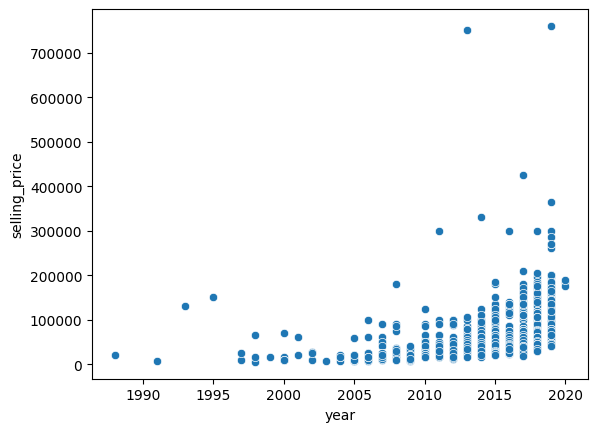

In [82]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
sns.scatterplot(x=df.year,y=df.selling_price)
#more old (<2005) bike is sold in less price,from 2010-2020 most of the bikes are sold out and some bike also sold above 700000

In [83]:
#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
encoded = ohe.fit_transform(df[["seller_type"]]).toarray()
ohe.get_feature_names_out()
resulted_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out())
resulted_df.head(5)


,seller_type_Dealer,seller_type_Individual
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


<Axes: >

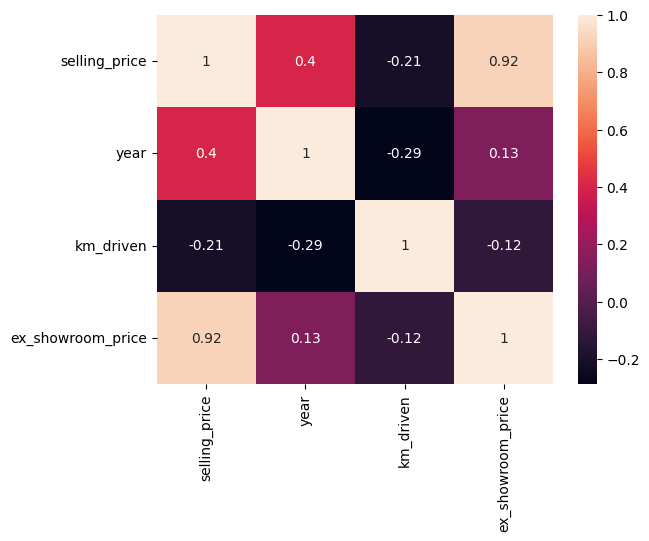

In [84]:
'''Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?'''
sns.heatmap(df.corr(numeric_only=True),annot=True)
#only ex_showroom-price feature has good correlation with selling price and other features have low correlation value with other features


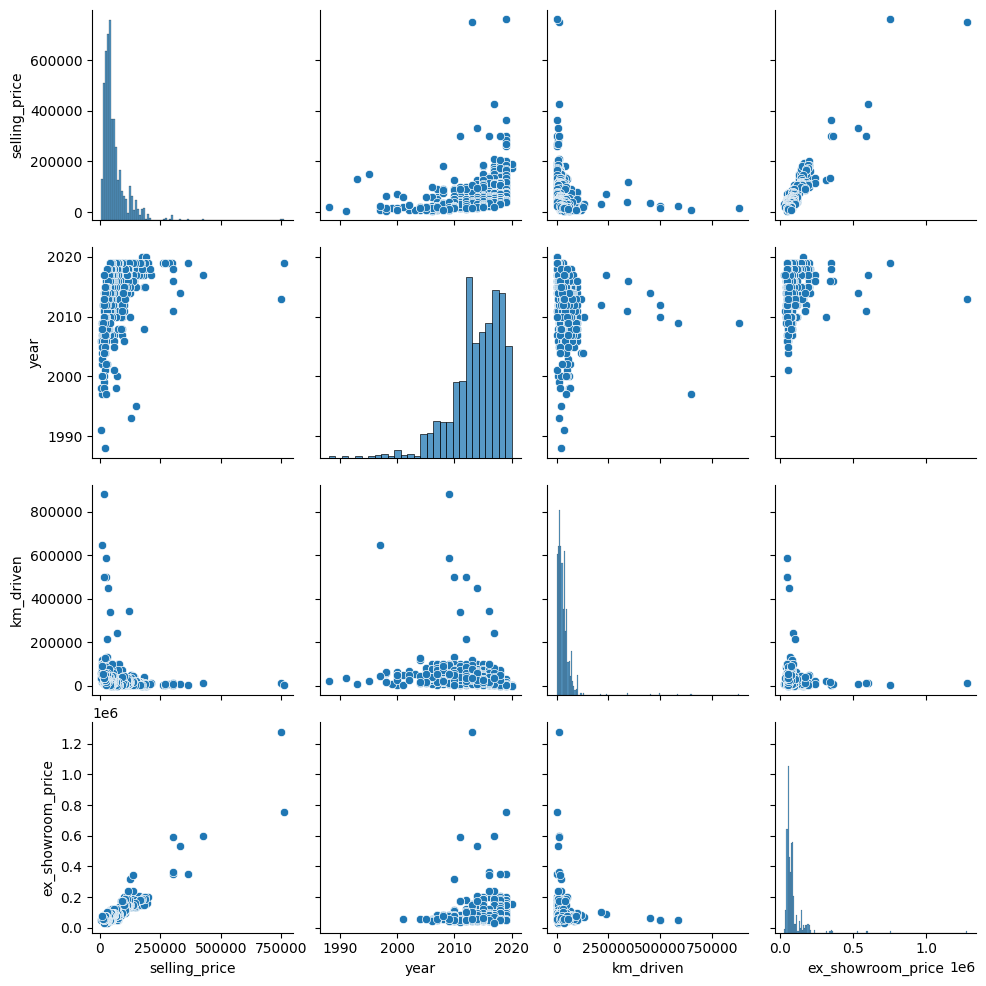

In [85]:
'''Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.'''

sns.pairplot(df)
#1.that the selling price is affected more by age of the bike,ex_showroom_price,km_driven and sellertype
#2. the datat cleaning process like outlier removal usin IQR method,one hot encding,handling outlier are performed
